In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Configure plotting style
plt.rcParams['figure.figsize'] = [12, 10]
sns.set_theme()
sns.set_style("whitegrid")

In [3]:
# Trajectory list
data = []
data.append(pd.read_csv('Trajectories/Steady_Dive_0deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_10deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_20deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_30deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_34deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_35deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_36deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_40deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_50deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_60deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_70deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_80deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Steady_Dive_90deg.csv', index_col='t'))
data.append(pd.read_csv('Trajectories/Dive_Level_1.csv', index_col='t'))
N = len(data)

Initial Velocity: 1217

Negative Acceleration: -25

Positive Acceleration: 30



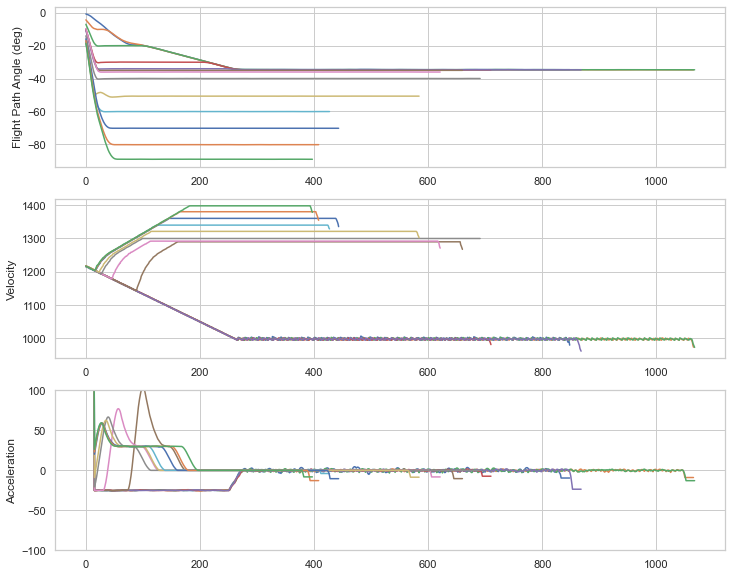

In [6]:
# Plot each trajectory
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ss_gamma = np.zeros(N)
ss_vel   = np.zeros(N)
ss_acc   = np.zeros(N)
vel0     = np.zeros(N)
for i in range(0, N-1):
    # Extract trajectory
    traj = data[i]
    
    # Locate start
    I = traj['vel'] > 0
    
    # Plot flight path angle
    ax1.plot(traj['gamma'][I].to_numpy())
    # ax1.plot(-traj['pitch'][I].to_numpy())
    ax1.set_ylabel('Flight Path Angle (deg)')
    
    # Plot velocity
    ax2.plot(traj['vel'][I].to_numpy())
    # ax2.plot(traj['velSmooth'][I].to_numpy())
    ax2.set_ylabel('Velocity')
    
    # Plot acceleration
    ax3.plot(traj['acc'][I].to_numpy())
    ax3.set_ylabel('Acceleration')
    ax3.set_ylim(-100, 100)
    
    # Extract initial velocity
    vel0[i] = traj['vel'][I].to_numpy()[0]
    
    # Extract steady state values
    ss_gamma[i] = np.median(traj['gamma'][I].to_numpy()[280:380])
    ss_vel[i]   = np.median(traj['vel'  ][I].to_numpy()[280:380])
    ss_acc[i]   = np.median(traj['acc'  ][I].to_numpy()[75:150])

# Print initial velocity
print(f'Initial Velocity: {np.median(vel0):.0f}\n')

# Print acceleration values
print(f'Negative Acceleration: {np.median(ss_acc[0:5]):.0f}\n')
print(f'Positive Acceleration: {np.median(ss_acc[9:14]):.0f}\n')

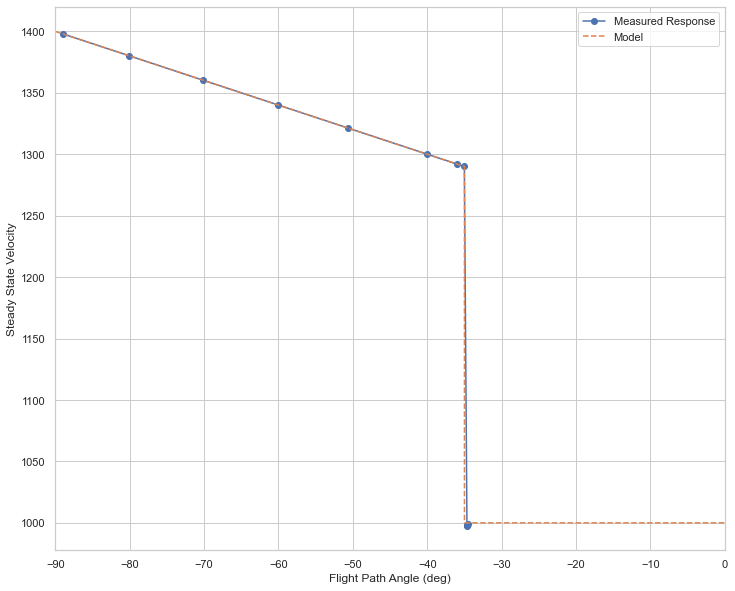

In [7]:
# Plot gamma-velocity relationship
plt.figure()
plt.plot(ss_gamma[:-1], ss_vel[:-1], 'o-')

# Plot gamma-velocity relationship fit
gamma_fit = np.array([-90, -35, -35, 0])
vel_fit   = -2*gamma_fit + 1220
vel_fit[2:] = 1000
plt.plot(gamma_fit, vel_fit, '--')
plt.xlabel('Flight Path Angle (deg)')
plt.ylabel('Steady State Velocity')
plt.legend(['Measured Response', 'Model'])
plt.xlim(-90, 0)
plt.show()

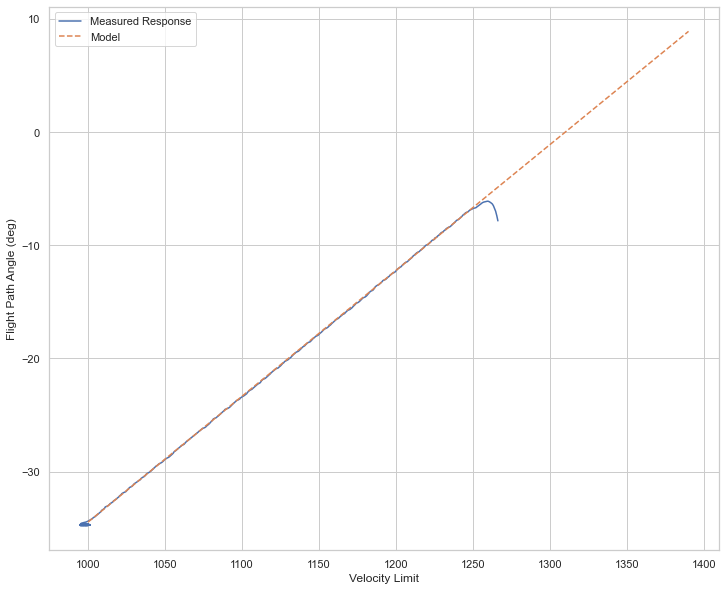

In [8]:
# Plot velocity-gamma relationship
plt.figure()
plt.plot(data[-1]['vel'].to_numpy()[810:], data[-1]['gamma'].to_numpy()[810:])

# Plot velocity-gamma relationship fit
vel_fit = np.arange(1000, 1400, 10)
gamma_fit = vel_fit / 9 - 1310 / 9
plt.plot(vel_fit, gamma_fit, '--')
plt.xlabel('Velocity Limit')
plt.ylabel('Flight Path Angle (deg)')
plt.legend(['Measured Response', 'Model'])
plt.show()